# < 3주차 과제 1 : MLP 마음대로 다뤄보기>
- dataset을 임의로 선정해서 직접 분석 해보기(제공한 코드를 활용해서 해보기)
- activation functions 중 relu사용시 함수 직접 정의
- lr, optimizer 등 바꿔보기
- hidden layer/neuron 수를 바꾸기
- 전처리도 추가
- 모든 시도를 올려주세요!
- 제일 높은 acc를 보인 시도를 명시해주세요!


In [1]:
import torch
from torch import nn, optim
from sklearn.datasets import load_breast_cancer
from torch.utils.data import  TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## 아래 데이터셋 중 원하는 데이터셋 하나를 선택하여, 코드 과제 진행하기!
- 1) load_digits() <br>
- 2) load_wine()

#1. breast_cancer dataset (기본 코드 돌려보기)

In [25]:
# 데이터셋 종류 :
data = load_breast_cancer()

In [26]:
input = data.data
output = data.target

In [27]:
print(input.shape, output.shape)

(569, 30) (569,)


In [28]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == "cuda":
  torch.cuda.manual_seed_all(777)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(input, output, test_size = 0.3, random_state = 42, stratify= data.target, shuffle = True)

x_train = torch.FloatTensor(x_train).to(device)
y_train = torch.LongTensor(y_train).to(device)
x_test = torch.FloatTensor(x_test)
y_test = torch.LongTensor(y_test)

# 데이터를 tensor로 바꿔주고 gpu 연산이 가능해지도록 gpu에 옮김
# label 값을 왜 long 에 옮겨놓는가? loss function이 다르기 때문

In [30]:
x_train.shape

torch.Size([398, 30])

In [31]:
y_train

tensor([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
        0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
        0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
        1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
        1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
        0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,

In [32]:
print(x_train[0])
print(y_train[0])

#input 30개 (속성이 30개)
#y의 class는 2개 (양성과 음성)

tensor([1.1620e+01, 1.8180e+01, 7.6380e+01, 4.0880e+02, 1.1750e-01, 1.4830e-01,
        1.0200e-01, 5.5640e-02, 1.9570e-01, 7.2550e-02, 4.1010e-01, 1.7400e+00,
        3.0270e+00, 2.7850e+01, 1.4590e-02, 3.2060e-02, 4.9610e-02, 1.8410e-02,
        1.8070e-02, 5.2170e-03, 1.3360e+01, 2.5400e+01, 8.8140e+01, 5.2810e+02,
        1.7800e-01, 2.8780e-01, 3.1860e-01, 1.4160e-01, 2.6600e-01, 9.2700e-02],
       device='cuda:0')
tensor(1, device='cuda:0')


파이토치에서는 데이터셋을 좀 더 쉽게 다룰 수 있도록 유용한 도구로서 torch.utils.data.Dataset과 torch.utils.data.DataLoader를 제공합니다. 이를 사용하면 미니 배치 학습, 데이터 셔플(shuffle), 병렬 처리까지 간단히 수행할 수 있습니다. 기본적인 사용 방법은 Dataset을 정의하고, 이를 DataLoader에 전달하는 것
- init : class 에서 객체가 생성되면 바로 실행되는 함수
- len : observation 수를 정의하는 함수
- getitem : iteration 마다 해당하는 데이터를 돌려주는 함수

In [33]:
from torch.utils.data import Dataset
class CustomDataset(Dataset):
  def __init__(self):
    self.x_data = x_train
    self.y_data = [[y] for y in y_train] # 리스트 element를 리스트에 넣기 (2차원)
#  데이터셋의 전처리를 해주는 부분

  def __len__(self):
    return len(self.x_data)
#  데이터셋의 길이. 즉, 총 샘플의 수를 적어주는 부분

  def __getitem__(self, idx):
    x = torch.FloatTensor(self.x_data[idx]).to(device)
    y = torch.LongTensor(self.y_data[idx]).to(device)
#  데이터셋에서 특정 1개의 샘플을 가져오는 함수

    return x,y

In [34]:
batch_size = 8

dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=batch_size)

In [35]:
# input_layer와 hidden_layer의 노드 개수를 어떻게 바꿔줘야할까?
# hidden layer/neuron 수를 바꾸기

# nn.Sequential을 사용하여 레이어를 연결

model = nn.Sequential(
          nn.Linear(30,398, bias=True),
          nn.Sigmoid(),
          nn.Linear(398,15, bias=True),
          nn.Sigmoid(),
          nn.Linear(15,2, bias=True),
          nn.Softmax()
          ).to(device)

class로 구현 가능
- init : 초기 생성 함수
- foward : 순전파(입력값 => 예측값 의 과정)

In [36]:
# nn.Module 클래스로 레이어 개별 호출

class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(30,398, bias=True), # input_layer = 30, hidden_layer1 = 398
          nn.Sigmoid(),
        nn.BatchNorm1d(398)
    )
  # activation function 이용
  #   nn.ReLU()
  #   nn.tanH()
  #   https://pytorch.org/docs/stable/nn.html 그 외에도 여기서 확인 가능함
  #   파라미터가 필요하지 않다는 것이 특징

  # batch normazliation 1d, 파라미터 값으로 vector의 길이를 전해줌
  # 추후에 이미지를 다루게 된다면, 그때는 batch normalization 2d를 이용하게 됨
  # 그때는 파라미터 값으로 채널, 가로, 세로 길이를 전달해주게 됨

    self.layer2 = nn.Sequential(
          nn.Linear(398,15, bias=True), # hidden_layer1 = 398, hidden_layer2 = 15
        nn.Sigmoid()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(15,10, bias=True), # hidden_layer1 = 15, hidden_layer2 = 10
        nn.Sigmoid()
    )
    self.layer4 = nn.Sequential(
        nn.Linear(10, 2, bias=True), # hidden_layer3 = 10, output_layer = 2
        nn.Softmax()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    return output

In [37]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight) #Xavier(분포) 초기화: 가중치 초기화 방식
        layer.bias.data.fill_(0.01) # bias 모두 0.01로 설정

        # 레이어가 선형인 경우 해당 레이어의 가중치를 Xavier uniform 분포로 초기화, 편향을 0.01로 설정

        #xavier사용
        # Layer의 weight를 어떤 분포를 가지도록 초기화시켜줌+global minimum찾기 위해서

In [38]:
model = Model().to(device)
model.apply(init_weights)

<ipython-input-37-43ede08f5ba9>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight) #Xavier(분포) 초기화: 가중치 초기화 방식


Model(
  (layer1): Sequential(
    (0): Linear(in_features=30, out_features=398, bias=True)
    (1): Sigmoid()
    (2): BatchNorm1d(398, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=398, out_features=15, bias=True)
    (1): Sigmoid()
  )
  (layer3): Sequential(
    (0): Linear(in_features=15, out_features=10, bias=True)
    (1): Sigmoid()
  )
  (layer4): Sequential(
    (0): Linear(in_features=10, out_features=2, bias=True)
    (1): Softmax(dim=None)
  )
)

In [39]:
print(model)

Model(
  (layer1): Sequential(
    (0): Linear(in_features=30, out_features=398, bias=True)
    (1): Sigmoid()
    (2): BatchNorm1d(398, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=398, out_features=15, bias=True)
    (1): Sigmoid()
  )
  (layer3): Sequential(
    (0): Linear(in_features=15, out_features=10, bias=True)
    (1): Sigmoid()
  )
  (layer4): Sequential(
    (0): Linear(in_features=10, out_features=2, bias=True)
    (1): Softmax(dim=None)
  )
)


In [40]:
loss_fn  = nn.CrossEntropyLoss().to(device)

# 여러가지 optimizer 시도해보기
# lr 바꿔보기


optimizer = optim.Adam(model.parameters(), lr= 0.01)

# https://pytorch.org/docs/stable/optim.html#module-torch.optim 페이지 참조
# optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
# sgd 등등

In [41]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # 비용 함수
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:   # 10 에폭마다 출력
    print(epoch, cost.item())

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


0 0.7273460030555725
10 0.5359482765197754
20 0.4567549526691437
30 0.41432684659957886
40 0.40345442295074463
50 0.40749630331993103
60 0.385957807302475
70 0.39281052350997925
80 0.39470788836479187
90 0.39987218379974365


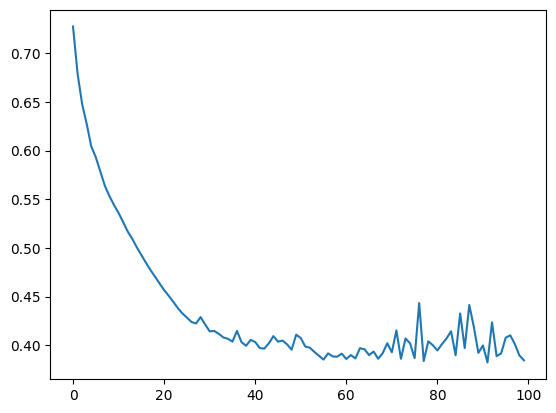

In [42]:
plt.plot(losses)
plt.show()

# 로스값이 좀 튐,,,

In [43]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test) # x_test로 예측값
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1) # 예측값에서 각 샘플에 대한 클래스(가장 높은 확률을 갖는 클래스)를 추출
  accuracy = (accuracy_score(predicted, y_test)) # 예측값과 실제 레이블(y_test)을 비교

In [44]:
print(f'model의 output은 :  {y_pred[0]}') # 1 값의 확률이 99.6%
print(f'argmax를 한 후의 output은 {predicted[0]}') # 따라서 argmax 출력이 1
print(f'accuracy는 {accuracy}')

model의 output은 :  [0.00430986 0.99569017]
argmax를 한 후의 output은 1
accuracy는 0.9064327485380117


# 2. wine dataset
1) activation function: `relu`

optimizer: `adam`

*   `lr = 0.01`

accuracy는 0.9814814814814815 ⭐️️️️️️️️️️️️

In [96]:
# 데이터셋 종류 : load_wine
from sklearn.datasets import load_wine
data = load_wine()

In [97]:
input = data.data
output = data.target

In [98]:
print(input.shape, output.shape)

(178, 13) (178,)


In [99]:
print(input[2], output[2])

[1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
 3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03] 0


In [100]:
output # 클래스 0, 1, 2 (3개)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [101]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == "cuda":
  torch.cuda.manual_seed_all(777)

In [102]:
x_train, x_test, y_train, y_test = train_test_split(input, output, test_size = 0.3, random_state = 42, stratify= data.target, shuffle = True)

x_train = torch.FloatTensor(x_train).to(device)
y_train = torch.LongTensor(y_train).to(device)
x_test = torch.FloatTensor(x_test)
y_test = torch.LongTensor(y_test)

# 데이터를 tensor로 바꿔주고 gpu 연산이 가능해지도록 gpu에 옮김
# label 값을 왜 long 에 옮겨놓는가? loss function이 다르기 때문

In [103]:
print(x_train.shape, y_train.shape)

torch.Size([124, 13]) torch.Size([124])


In [104]:
from torch.utils.data import Dataset
class CustomDataset(Dataset):
  def __init__(self):
    self.x_data = x_train
    self.y_data = [[y] for y in y_train]
#  데이터셋의 전처리를 해주는 부분

  def __len__(self):
    return len(self.x_data)
#  데이터셋의 길이. 즉, 총 샘플의 수를 적어주는 부분

  def __getitem__(self, idx):
    x = torch.FloatTensor(self.x_data[idx]).to(device)
    y = torch.LongTensor(self.y_data[idx]).to(device)
#  데이터셋에서 특정 1개의 샘플을 가져오는 함수

    return x,y

In [105]:
batch_size = 8

dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=batch_size)

In [106]:
'''
지금까지 기본코드
'''

'\n지금까지 기본코드\n'

In [55]:
# input_layer와 hidden_layer의 노드 개수를 어떻게 바꿔줘야할까?
# hidden layer/neuron 수를 바꾸기

model = nn.Sequential(
          nn.Linear(13,124, bias=True),
          nn.Sigmoid(),
          nn.Linear(124,60, bias=True),
          nn.Sigmoid(),
          nn.Linear(60,15, bias=True),
          nn.Sigmoid(),
          nn.Linear(15,3, bias=True),
          nn.Softmax()
          ).to(device)

In [56]:
# 활성화 함수로 relu 사용, 1번 3번 layer에 추가

class Model(torch.nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(13, 124, bias=True),
            nn.ReLU(),  # ReLU 활성화 함수 사용
            nn.BatchNorm1d(124)
        )
        self.layer2 = nn.Sequential(
            nn.Linear(124, 60, bias=True),
        )
        self.layer3 = nn.Sequential(
            nn.Linear(60, 15, bias=True),
            nn.ReLU()
        )
        self.layer4 = nn.Sequential(
            nn.Linear(15, 3, bias=True),
            nn.Softmax()
        )

    def forward(self, x):
        output = self.layer1(x)
        output = self.layer2(output)
        output = self.layer3(output)
        output = self.layer4(output)
        return output


In [ ]:
# relu 직접 정의
'''
import torch.nn.functional as F

# relu 함수 정의
def relu(x):
    return torch.maximum(torch.tensor(0, dtype=torch.float), x)

class Model(torch.nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(13, 124, bias=True),
            nn.BatchNorm1d(124)
        )
        self.layer2 = nn.Sequential(
            nn.Linear(124, 60, bias=True)
        )
        self.layer3 = nn.Sequential(
            nn.Linear(60, 15, bias=True)
        )
        self.layer4 = nn.Sequential(
            nn.Linear(15, 3, bias=True),
            nn.Softmax()
        )

    def forward(self, x):
        output = relu(self.layer1(x))
        output = self.layer2(output)
        output = relu(self.layer3(output))
        output = self.layer4(output)
        return output

'''

In [58]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight)
        layer.bias.data.fill_(0.01)

        #xavier사용
        # Layer의 weight를 어떤 분포를 가지도록 초기화시켜줌+global minimum찾기 위해서

In [59]:
model = Model().to(device)
model.apply(init_weights)

<ipython-input-58-6196a47a4462>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=124, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(124, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=124, out_features=60, bias=True)
  )
  (layer3): Sequential(
    (0): Linear(in_features=60, out_features=15, bias=True)
    (1): ReLU()
  )
  (layer4): Sequential(
    (0): Linear(in_features=15, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)

In [60]:
print(model)

Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=124, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(124, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=124, out_features=60, bias=True)
  )
  (layer3): Sequential(
    (0): Linear(in_features=60, out_features=15, bias=True)
    (1): ReLU()
  )
  (layer4): Sequential(
    (0): Linear(in_features=15, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)


In [61]:
loss_fn  = nn.CrossEntropyLoss().to(device)

# 여러가지 optimizer 시도해보기
# lr 바꿔보기


optimizer = optim.Adam(model.parameters(), lr= 0.01)

# https://pytorch.org/docs/stable/optim.html#module-torch.optim 페이지 참조
# optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
# AdamW, Adagrad, RMSprop

In [62]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # 비용 함수
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


0 1.085267424583435
10 0.801482081413269
20 0.6523782014846802
30 0.6064810752868652
40 0.6000143885612488
50 0.5978390574455261
60 0.5906633734703064
70 0.5862557291984558
80 0.5811596512794495
90 0.5629099011421204


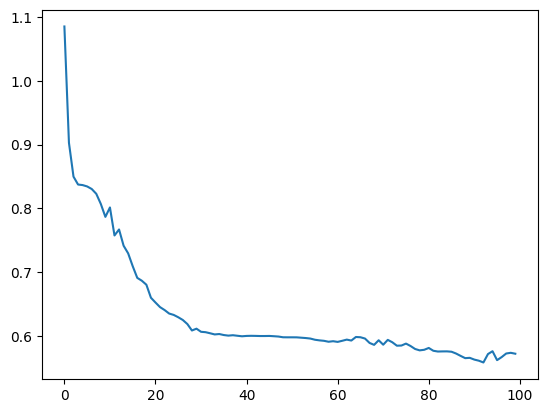

In [63]:
plt.plot(losses)
plt.show()


In [64]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

In [65]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [1.0000000e+00 7.2151563e-17 4.2131884e-10]
argmax를 한 후의 output은 0
accuracy는 0.9814814814814815


# 2. wine dataset
2) activation function: `relu`

optimizer: `adam`

*   `lr = 0.05`

accuracy는 0.7222222222222222

In [76]:
# 활성화 함수로 relu 사용, 1번 3번 layer에 추가

class Model(torch.nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(13, 124, bias=True),
            nn.ReLU(),  # ReLU 활성화 함수 사용
            nn.BatchNorm1d(124)
        )
        self.layer2 = nn.Sequential(
            nn.Linear(124, 60, bias=True),
        )
        self.layer3 = nn.Sequential(
            nn.Linear(60, 15, bias=True),
            nn.ReLU()
        )
        self.layer4 = nn.Sequential(
            nn.Linear(15, 3, bias=True),
            nn.Softmax()
        )

    def forward(self, x):
        output = self.layer1(x)
        output = self.layer2(output)
        output = self.layer3(output)
        output = self.layer4(output)
        return output


In [77]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight)
        layer.bias.data.fill_(0.01)

        #xavier사용
        # Layer의 weight를 어떤 분포를 가지도록 초기화시켜줌+global minimum찾기 위해서

In [78]:
model = Model().to(device)
model.apply(init_weights)

<ipython-input-77-6196a47a4462>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=124, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(124, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=124, out_features=60, bias=True)
  )
  (layer3): Sequential(
    (0): Linear(in_features=60, out_features=15, bias=True)
    (1): ReLU()
  )
  (layer4): Sequential(
    (0): Linear(in_features=15, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)

In [79]:
print(model)

Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=124, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(124, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=124, out_features=60, bias=True)
  )
  (layer3): Sequential(
    (0): Linear(in_features=60, out_features=15, bias=True)
    (1): ReLU()
  )
  (layer4): Sequential(
    (0): Linear(in_features=15, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)


In [80]:
loss_fn  = nn.CrossEntropyLoss().to(device)

# 여러가지 optimizer 시도해보기
# lr 바꿔보기


optimizer = optim.Adam(model.parameters(), lr= 0.05)

# https://pytorch.org/docs/stable/optim.html#module-torch.optim 페이지 참조
# optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
# AdamW, Adagrad, RMSprop

In [81]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # 비용 함수
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

0 1.085267424583435
10 0.8597623705863953
20 0.8581475019454956
30 0.8577426075935364
40 0.8503654599189758
50 0.8489353656768799
60 0.8534808158874512
70 0.8572056889533997
80 0.8465803265571594
90 0.8498089909553528


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


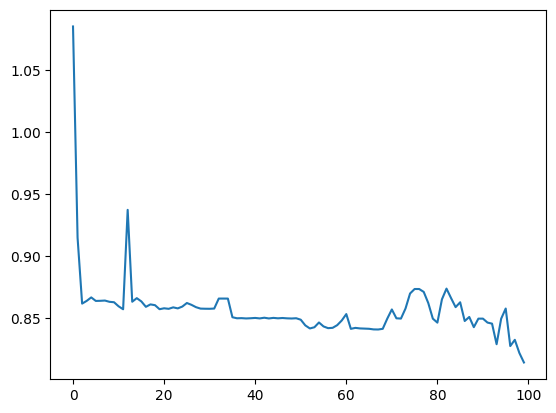

In [82]:
plt.plot(losses)
plt.show()

In [83]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

In [84]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [1. 0. 0.]
argmax를 한 후의 output은 0
accuracy는 0.7222222222222222


# 2. wine dataset
3) activation function: `relu`

optimizer: `adam`

*   `lr = 0.1`

accuracy는 0.2777777777777778

In [107]:
# 활성화 함수로 relu 사용, 1번 3번 layer에 추가

class Model(torch.nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(13, 124, bias=True),
            nn.ReLU(),  # ReLU 활성화 함수 사용
            nn.BatchNorm1d(124)
        )
        self.layer2 = nn.Sequential(
            nn.Linear(124, 60, bias=True),
        )
        self.layer3 = nn.Sequential(
            nn.Linear(60, 15, bias=True),
            nn.ReLU()
        )
        self.layer4 = nn.Sequential(
            nn.Linear(15, 3, bias=True),
            nn.Softmax()
        )

    def forward(self, x):
        output = self.layer1(x)
        output = self.layer2(output)
        output = self.layer3(output)
        output = self.layer4(output)
        return output


In [108]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight)
        layer.bias.data.fill_(0.01)

        #xavier사용
        # Layer의 weight를 어떤 분포를 가지도록 초기화시켜줌+global minimum찾기 위해서

In [109]:
model = Model().to(device)
model.apply(init_weights)

<ipython-input-108-6196a47a4462>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=124, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(124, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=124, out_features=60, bias=True)
  )
  (layer3): Sequential(
    (0): Linear(in_features=60, out_features=15, bias=True)
    (1): ReLU()
  )
  (layer4): Sequential(
    (0): Linear(in_features=15, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)

In [ ]:
print(model)

In [111]:
loss_fn  = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr= 0.1)

In [112]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # 비용 함수
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

0 1.085267424583435
10 0.8518590331077576
20 1.035315990447998
30 1.0514448881149292
40 1.0350674390792847
50 0.9890546202659607
60 1.253057599067688
70 1.2853156328201294
80 1.2853156328201294


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


90 1.2853156328201294


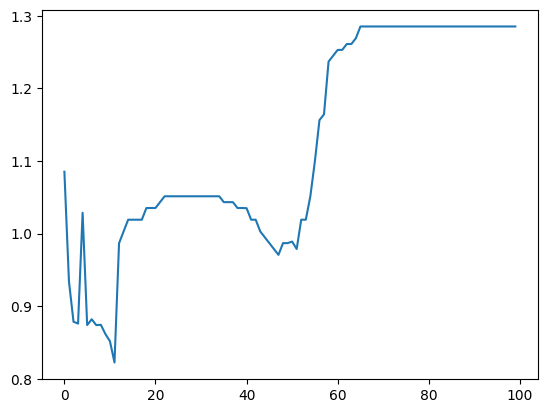

In [113]:
plt.plot(losses)
plt.show()

In [114]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

In [115]:
print(f'model의 output은 :  {y_pred[3]}')
print(f'argmax를 한 후의 output은 {predicted[3]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [0. 0. 1.]
argmax를 한 후의 output은 2
accuracy는 0.2777777777777778


# 2. wine dataset
4) activation function: `relu`

optimizer: `sgd`

*   `lr = 0.01`

accuracy는 0.7037037037037037

In [117]:
# 활성화 함수로 relu 사용, 1번 3번 layer에 추가

class Model(torch.nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(13, 124, bias=True),
            nn.ReLU(),  # ReLU 활성화 함수 사용
            nn.BatchNorm1d(124)
        )
        self.layer2 = nn.Sequential(
            nn.Linear(124, 60, bias=True),
        )
        self.layer3 = nn.Sequential(
            nn.Linear(60, 15, bias=True),
            nn.ReLU()
        )
        self.layer4 = nn.Sequential(
            nn.Linear(15, 3, bias=True),
            nn.Softmax()
        )

    def forward(self, x):
        output = self.layer1(x)
        output = self.layer2(output)
        output = self.layer3(output)
        output = self.layer4(output)
        return output


In [118]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight)
        layer.bias.data.fill_(0.01)

        #xavier사용
        # Layer의 weight를 어떤 분포를 가지도록 초기화시켜줌+global minimum찾기 위해서

In [119]:
model = Model().to(device)
model.apply(init_weights)

<ipython-input-118-6196a47a4462>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=124, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(124, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=124, out_features=60, bias=True)
  )
  (layer3): Sequential(
    (0): Linear(in_features=60, out_features=15, bias=True)
    (1): ReLU()
  )
  (layer4): Sequential(
    (0): Linear(in_features=15, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)

In [120]:
print(model)

Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=124, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(124, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=124, out_features=60, bias=True)
  )
  (layer3): Sequential(
    (0): Linear(in_features=60, out_features=15, bias=True)
    (1): ReLU()
  )
  (layer4): Sequential(
    (0): Linear(in_features=15, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)


In [121]:
loss_fn  = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [122]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # 비용 함수
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


0 1.1658638715744019
10 0.9905550479888916
20 0.8852957487106323
30 0.8714236617088318
40 0.8602120876312256
50 0.8544826507568359
60 0.850588858127594
70 0.8476703763008118
80 0.8448569774627686
90 0.8423047065734863


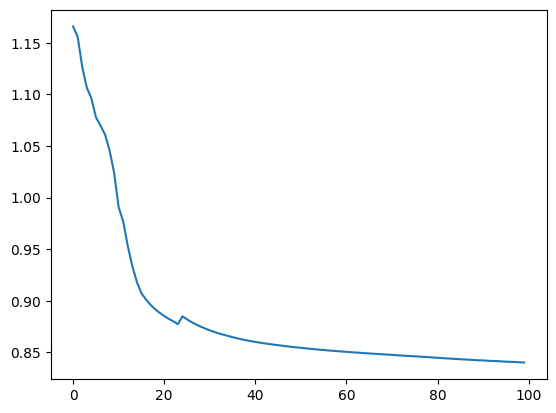

In [123]:
plt.plot(losses)
plt.show()

In [124]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

In [127]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [0.9832708  0.00552113 0.011208  ]
argmax를 한 후의 output은 0
accuracy는 0.7037037037037037


# 2. wine dataset
5) activation function: `relu`

optimizer: `sgd`

*   `lr = 0.05`

accuracy는 0.6851851851851852

In [131]:
# 활성화 함수로 relu 사용, 1번 3번 layer에 추가

class Model(torch.nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(13, 124, bias=True),
            nn.ReLU(),  # ReLU 활성화 함수 사용
            nn.BatchNorm1d(124)
        )
        self.layer2 = nn.Sequential(
            nn.Linear(124, 60, bias=True),
        )
        self.layer3 = nn.Sequential(
            nn.Linear(60, 15, bias=True),
            nn.ReLU()
        )
        self.layer4 = nn.Sequential(
            nn.Linear(15, 3, bias=True),
            nn.Softmax()
        )

    def forward(self, x):
        output = self.layer1(x)
        output = self.layer2(output)
        output = self.layer3(output)
        output = self.layer4(output)
        return output

In [132]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight)
        layer.bias.data.fill_(0.01)

        #xavier사용
        # Layer의 weight를 어떤 분포를 가지도록 초기화시켜줌+global minimum찾기 위해서

In [133]:
model = Model().to(device)
model.apply(init_weights)

<ipython-input-132-6196a47a4462>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=124, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(124, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=124, out_features=60, bias=True)
  )
  (layer3): Sequential(
    (0): Linear(in_features=60, out_features=15, bias=True)
    (1): ReLU()
  )
  (layer4): Sequential(
    (0): Linear(in_features=15, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)

In [134]:
loss_fn  = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.05)

In [135]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # 비용 함수
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

0 1.2041184902191162
10 0.9571771025657654
20 0.8872349262237549
30 0.8511684536933899
40 0.8479246497154236
50 0.8440778255462646
60 0.8400231003761292
70 0.8370481133460999
80 0.8345801830291748
90 0.8322960734367371


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


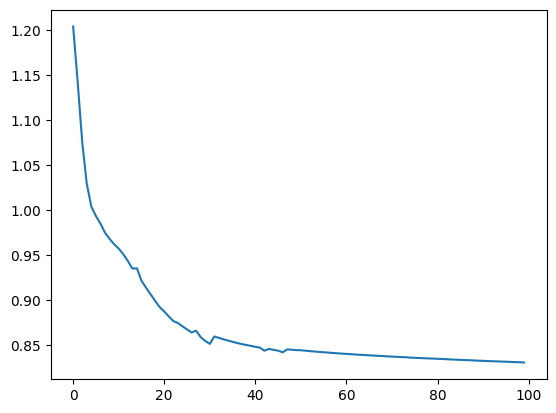

In [136]:
plt.plot(losses)
plt.show()

In [137]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [0.9931298  0.00224632 0.00462389]
argmax를 한 후의 output은 0
accuracy는 0.6851851851851852


# 2. wine dataset
6) activation function: `tanh`

optimizer: `adam`

*   `lr = 0.01`

accuracy는 0.8518518518518519

In [138]:
# Tanh 활성화 함수 사용

class Model(torch.nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(13, 124, bias=True),
            nn.Tanh(),  # Tanh 활성화 함수 사용
            nn.BatchNorm1d(124)
        )
        self.layer2 = nn.Sequential(
            nn.Linear(124, 60, bias=True)
        )
        self.layer3 = nn.Sequential(
            nn.Linear(60, 15, bias=True),
            nn.Tanh()  # Tanh 활성화 함수 사용
        )
        self.layer4 = nn.Sequential(
            nn.Linear(15, 3, bias=True),
            nn.Softmax()
        )

    def forward(self, x):
        output = self.layer1(x)
        output = self.layer2(output)
        output = self.layer3(output)
        output = self.layer4(output)
        return output


In [139]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight)
        layer.bias.data.fill_(0.01)

        #xavier사용
        # Layer의 weight를 어떤 분포를 가지도록 초기화시켜줌+global minimum찾기 위해서

In [140]:
model = Model().to(device)
model.apply(init_weights)

<ipython-input-139-6196a47a4462>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=124, bias=True)
    (1): Tanh()
    (2): BatchNorm1d(124, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=124, out_features=60, bias=True)
  )
  (layer3): Sequential(
    (0): Linear(in_features=60, out_features=15, bias=True)
    (1): Tanh()
  )
  (layer4): Sequential(
    (0): Linear(in_features=15, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)

In [141]:
loss_fn  = nn.CrossEntropyLoss().to(device)

optimizer = optim.Adam(model.parameters(), lr= 0.01)

In [142]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # 비용 함수
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

0 1.126857876777649
10 0.8241126537322998
20 0.6663126349449158
30 0.6810927391052246
40 0.6522443890571594
50 0.6373974680900574
60 0.6660875678062439
70 0.6396560668945312
80 0.63236004114151
90 0.665524959564209


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


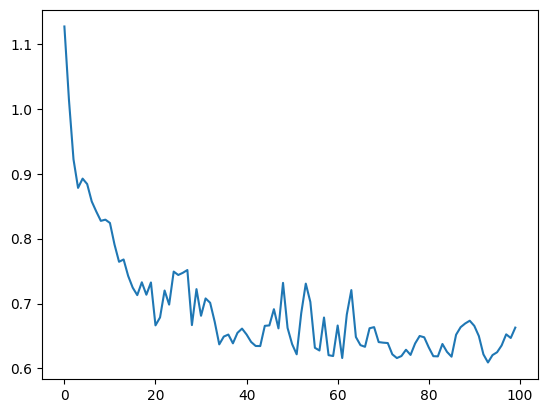

In [143]:
plt.plot(losses)
plt.show()

In [144]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [9.9817312e-01 1.7217286e-03 1.0516067e-04]
argmax를 한 후의 output은 0
accuracy는 0.8518518518518519


# 2. wine dataset
7) activation function: `tanh`

optimizer: `adagrad`

*   `lr = 0.01`

accuracy는 0.9444444444444444 ⭐️

In [145]:
# Tanh 활성화 함수 사용

class Model(torch.nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(13, 124, bias=True),
            nn.Tanh(),  # Tanh 활성화 함수 사용
            nn.BatchNorm1d(124)
        )
        self.layer2 = nn.Sequential(
            nn.Linear(124, 60, bias=True)
        )
        self.layer3 = nn.Sequential(
            nn.Linear(60, 15, bias=True),
            nn.Tanh()  # Tanh 활성화 함수 사용
        )
        self.layer4 = nn.Sequential(
            nn.Linear(15, 3, bias=True),
            nn.Softmax()
        )

    def forward(self, x):
        output = self.layer1(x)
        output = self.layer2(output)
        output = self.layer3(output)
        output = self.layer4(output)
        return output

In [146]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight)
        layer.bias.data.fill_(0.01)

In [147]:
model = Model().to(device)
model.apply(init_weights)

<ipython-input-146-6dcf2c5a1d5c>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=124, bias=True)
    (1): Tanh()
    (2): BatchNorm1d(124, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=124, out_features=60, bias=True)
  )
  (layer3): Sequential(
    (0): Linear(in_features=60, out_features=15, bias=True)
    (1): Tanh()
  )
  (layer4): Sequential(
    (0): Linear(in_features=15, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)

In [148]:
loss_fn  = nn.CrossEntropyLoss().to(device)

optimizer = optim.Adagrad(model.parameters(), lr=0.01)

In [149]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # 비용 함수
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

0 1.0990465879440308
10 0.846467912197113
20 0.8332355618476868
30 0.7757136225700378
40 0.7412880659103394
50 0.7241376042366028
60 0.6812735199928284
70 0.6544704437255859
80 0.6434462070465088
90 0.6478731036186218


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


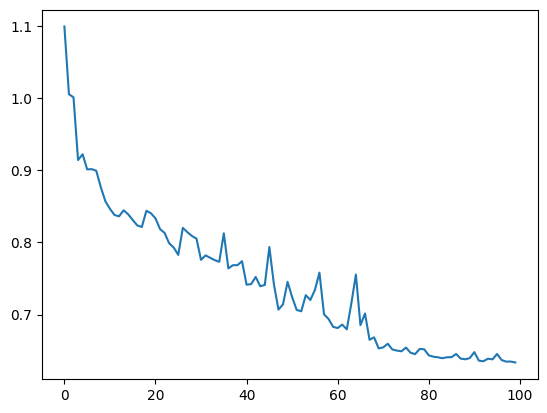

In [150]:
plt.plot(losses)
plt.show()

In [151]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [0.99055743 0.00629062 0.00315184]
argmax를 한 후의 output은 0
accuracy는 0.9444444444444444


# 2. wine dataset
8) activation function: `tanh`

optimizer: `RMSprop`
(Adagrad의 단점을 개선하기 위해 제안된 알고리즘)

*   `lr = 0.01`

accuracy는 0.3888888888888889

In [152]:
# Tanh 활성화 함수 사용

class Model(torch.nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(13, 124, bias=True),
            nn.Tanh(),  # Tanh 활성화 함수 사용
            nn.BatchNorm1d(124)
        )
        self.layer2 = nn.Sequential(
            nn.Linear(124, 60, bias=True)
        )
        self.layer3 = nn.Sequential(
            nn.Linear(60, 15, bias=True),
            nn.Tanh()  # Tanh 활성화 함수 사용
        )
        self.layer4 = nn.Sequential(
            nn.Linear(15, 3, bias=True),
            nn.Softmax()
        )

    def forward(self, x):
        output = self.layer1(x)
        output = self.layer2(output)
        output = self.layer3(output)
        output = self.layer4(output)
        return output

In [153]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight)
        layer.bias.data.fill_(0.01)

In [154]:
model = Model().to(device)
model.apply(init_weights)

<ipython-input-153-6dcf2c5a1d5c>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=124, bias=True)
    (1): Tanh()
    (2): BatchNorm1d(124, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=124, out_features=60, bias=True)
  )
  (layer3): Sequential(
    (0): Linear(in_features=60, out_features=15, bias=True)
    (1): Tanh()
  )
  (layer4): Sequential(
    (0): Linear(in_features=15, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)

In [155]:
loss_fn  = nn.CrossEntropyLoss().to(device)
optimizer = optim.RMSprop(model.parameters(), lr=0.01)

In [156]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # 비용 함수
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

0 1.1168107986450195
10 1.1332098245620728
20 1.0846620798110962
30 1.0848256349563599
40 1.0849988460540771
50 1.0848100185394287
60 1.0847539901733398
70 1.0848305225372314
80 1.08489990234375
90 1.0848655700683594


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


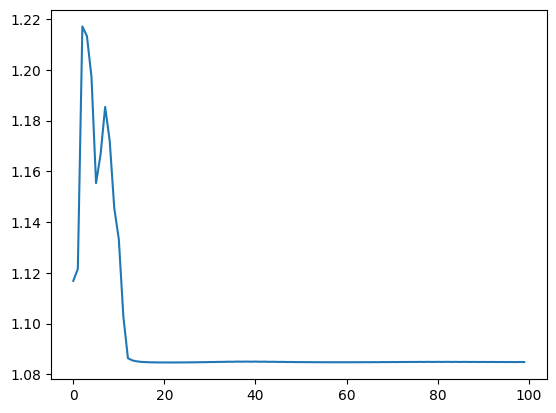

In [157]:
plt.plot(losses)
plt.show()

In [158]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [0.30847275 0.57135516 0.12017208]
argmax를 한 후의 output은 1
accuracy는 0.3888888888888889


# 2. wine dataset
9) activation function: `tanh`

optimizer: `SGD`
*   `lr = 0.01`

accuracy는 0.3888888888888889

In [159]:
# Tanh 활성화 함수 사용

class Model(torch.nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(13, 124, bias=True),
            nn.Tanh(),  # Tanh 활성화 함수 사용
            nn.BatchNorm1d(124)
        )
        self.layer2 = nn.Sequential(
            nn.Linear(124, 60, bias=True)
        )
        self.layer3 = nn.Sequential(
            nn.Linear(60, 15, bias=True),
            nn.Tanh()  # Tanh 활성화 함수 사용
        )
        self.layer4 = nn.Sequential(
            nn.Linear(15, 3, bias=True),
            nn.Softmax()
        )

    def forward(self, x):
        output = self.layer1(x)
        output = self.layer2(output)
        output = self.layer3(output)
        output = self.layer4(output)
        return output

In [160]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight)
        layer.bias.data.fill_(0.01)

In [161]:
model = Model().to(device)
model.apply(init_weights)

<ipython-input-160-6dcf2c5a1d5c>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=124, bias=True)
    (1): Tanh()
    (2): BatchNorm1d(124, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=124, out_features=60, bias=True)
  )
  (layer3): Sequential(
    (0): Linear(in_features=60, out_features=15, bias=True)
    (1): Tanh()
  )
  (layer4): Sequential(
    (0): Linear(in_features=15, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)

In [163]:
loss_fn  = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr= 0.01)

In [164]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # 비용 함수
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

0 1.131584644317627
10 1.0987054109573364
20 1.0975509881973267
30 1.0967158079147339
40 1.081608772277832
50 1.0896897315979004
60 1.0703717470169067
70 1.0873247385025024
80 1.0864084959030151
90 1.0855774879455566


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


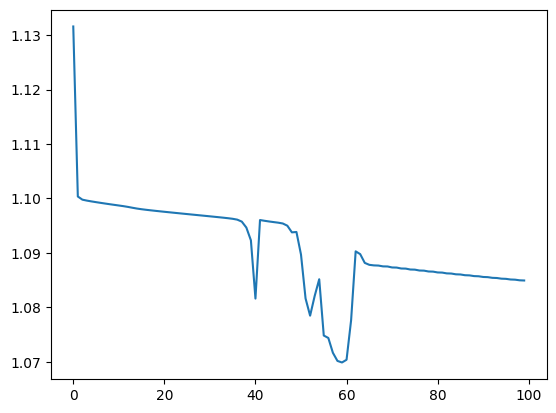

In [165]:
plt.plot(losses)
plt.show()

In [166]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [0.33492443 0.35247105 0.31260452]
argmax를 한 후의 output은 1
accuracy는 0.3888888888888889


#lr = 0.01일 때 가장 높은 정확도
activatin function에 따른 최적화된 옵티마이저 조합은 relu-adam, tanh-adagrad

# < 3주차 과제 2 : CNN 맛보기>

In [31]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [32]:
# Training settings
batch_size = 64

# MNIST Dataset
train_dataset = datasets.MNIST(root='./data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data/',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 251617168.65it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 39126516.09it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 79294313.06it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 7497256.50it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [33]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 10, kernel_size = 5)
    self.conv2 = nn.Conv2d(10, 20, kernel_size = 5)
    self.mp = nn.MaxPool2d(2)
    self.fc = nn.Linear(320 , 10) ### : 알맞는 input은?

  def forward(self, x):
    in_size = x.size(0)
    x = F.relu(self.mp(self.conv1(x)))
    x = F.relu(self.mp(self.conv2(x)))
    x = x.view(in_size, -1)
    x = self.fc(x)
    return F.log_softmax(x)

In [37]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

In [38]:
def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))

In [39]:
def test():
    model.eval() #model.eval() 의 기능은?
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [40]:
for epoch in range(1, 10):
    train(epoch)
    test()

<ipython-input-36-006ecbc6c563>:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.311519
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.287934
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.273714
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.254556
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.241865
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.207538
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.159414
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.155801
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.069215
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.910758
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.767062
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.586539
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.415338
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.077908
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.860058
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.776644
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.821930
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.611289
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.624427
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.913928
Train Epoch: 1 [12800/60000 (

<ipython-input-39-f52337105c2a>:6: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.10/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 0.1660, Accuracy: 9516/10000 (95%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.126898
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.093021
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.084606
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.130588
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.189685
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.083588
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.119133
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.201479
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.211834
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.130028
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.128413
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.250810
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.212908
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.118573
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.085949
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.122269
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.138801
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.234220
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.112637
Train Epoch: 2 [12